<a href="https://colab.research.google.com/github/aliaagamall/Deep-Statistical-Analysis/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistical Tests for A/B Testing

Welcome👋
This enriched notebook now uses realistic A/B testing scenarios from e-commerce and digital marketing, with detailed data presentation, statistical summaries, visualizations, and Python code. I’ll cover `t-test`, `Z-test`, `Chi-square`, `ANOVA`, `Mann-Whitney U`, and `Bayesian tests`, explaining concepts like `normal distribution`, `independent samples`, `equal variance`, and `known variance`.
Let’s get started🥰

### Key Concepts

1. **Normal Distribution:** Bell-shaped data where most values cluster around the mean (e.g., average order value ~$50 with slight variation).
2. **Independent Samples:** Distinct user groups (e.g., separate customers for each ad campaign).
3. **Equal Variance:** Similar data spread across groups (e.g., similar standard deviations in purchase amounts).
4. **Known Variance:** Pre-known population variability (e.g., historical click-through rates vary by 1.5%).

### **Overview of Statistical Tests:**  
  - Statistical tests help determine if differences between groups (e.g., ads or prices) are real or due to chance.  
  - Each test has a purpose: t-test and Z-test for numerical data, Chi-square for categorical (yes/no), ANOVA for multiple groups, Mann-Whitney for uneven data, and Bayesian for small samples with probabilities.  
  - Goal is to make informed decisions to improve business outcomes.  

- **What is p-value?:**  
  - p-value indicates if a difference is significant or random.  
  - If p-value < 0.05 (less than 5% chance of randomness), the difference is considered real.  
  - If p-value > 0.05, the difference isn’t strong enough, needing more testing.  
  - Acts like a confidence meter for results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind , chi2_contingency , f_oneway , mannwhitneyu
from statsmodels.stats.weightstats import ztest
import pymc as pm
from tabulate import tabulate

In [2]:
np.random.seed(42)

## t-test (Comparing Ad Campaign Conversion Rates)

**Scenario:** Testing two ad designs for an online store selling shoes. Control ad (blue banner) vs. Treatment ad (red banner) with 500 users each.

In [3]:
data_ttest = pd.DataFrame({
    'ad_type': ['control'] * 500 + ['treatment'] * 500,
    'converted': np.concatenate([
        np.random.binomial(1, 0.18, 500),  # 18% conversion (blue banner)
        np.random.binomial(1, 0.22, 500)   # 22% conversion (red banner)
    ])
})

# Display data preview and summary
print("Data Preview:")
print(tabulate(data_ttest.sample(5) , headers='keys', tablefmt='pipe'))
print("\nStatistical Summary:")
print(tabulate(data_ttest.groupby('ad_type')['converted'].describe(), headers='keys', tablefmt='pipe'))

Data Preview:
|     | ad_type   |   converted |
|----:|:----------|------------:|
| 672 | treatment |           0 |
|  33 | control   |           1 |
| 751 | treatment |           1 |
| 611 | treatment |           1 |
| 179 | control   |           0 |

Statistical Summary:
| ad_type   |   count |   mean |      std |   min |   25% |   50% |   75% |   max |
|:----------|--------:|-------:|---------:|------:|------:|------:|------:|------:|
| control   |     500 |  0.184 | 0.387872 |     0 |     0 |     0 |     0 |     1 |
| treatment |     500 |  0.206 | 0.404836 |     0 |     0 |     0 |     0 |     1 |


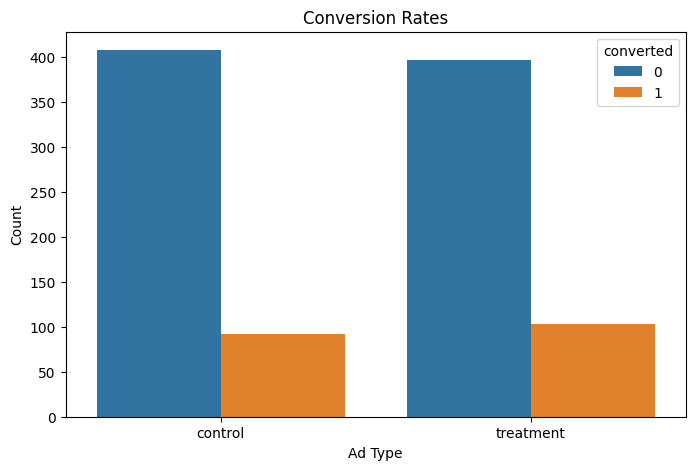

In [4]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='ad_type', hue='converted', data=data_ttest)
plt.title("Conversion Rates")
plt.xlabel("Ad Type")
plt.ylabel("Count")
plt.show()

In [5]:
# Extract groups
control_group = data_ttest[data_ttest['ad_type'] == 'control']['converted']
treatment_group = data_ttest[data_ttest['ad_type'] == 'treatment']['converted']

# Perform t-test
t_stat, p_value = ttest_ind(control_group, treatment_group)
print("\nT-test Results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.4f}")


T-test Results:
t-statistic: -0.88
p-value: 0.3805


**Interpretation**: p-value > 0.05, no significant difference (4% lift not conclusive).

## Z-test (Large-Scale Email Campaign Open Rates)
**Scenario**: Testing email subject lines for a retail chain. Control (generic subject) vs. Treatment (personalized subject) with 10,000 users each.

In [6]:
data_ztest = pd.DataFrame({
    'email_type': ['control'] * 10000 + ['treatment'] * 10000,
    'opened': np.concatenate([
        np.random.binomial(1, 0.25, 10000),  # 25% open rate
        np.random.binomial(1, 0.28, 10000)   # 28% open rate
    ])
})

print("Data Preview:")
print(tabulate(data_ztest.sample(5) , headers='keys', tablefmt='pipe'))
print("\nStatistical Summary:")
print(tabulate(data_ztest.groupby('email_type')['opened'].describe(), headers='keys', tablefmt='pipe'))

Data Preview:
|       | email_type   |   opened |
|------:|:-------------|---------:|
| 10672 | treatment    |        0 |
|  6114 | control      |        1 |
|   199 | control      |        1 |
|  1893 | control      |        1 |
| 15784 | treatment    |        0 |

Statistical Summary:
| email_type   |   count |   mean |      std |   min |   25% |   50% |   75% |   max |
|:-------------|--------:|-------:|---------:|------:|------:|------:|------:|------:|
| control      |   10000 | 0.2463 | 0.430877 |     0 |     0 |     0 |     0 |     1 |
| treatment    |   10000 | 0.2759 | 0.446989 |     0 |     0 |     0 |     1 |     1 |


In [7]:
# Extract groups
control_group = data_ztest[data_ztest['email_type'] == 'control']['opened']
treatment_group = data_ztest[data_ztest['email_type'] == 'treatment']['opened']

# Perform Z-test
z_stat, p_value = ztest(control_group, treatment_group)
print("\nZ-test Results:")
print(f"z-statistic: {z_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Z-test Results:
z-statistic: -4.77
p-value: 0.0000


**Interpretation**: p-value < 0.05, 3% lift is significant.

## Chi-square Test (Product Page Layout Preferences)

**Scenario**: Testing two layouts for a product page (Layout A vs. Layout B) with 5,000 users each, tracking purchases.

In [8]:
np.random.seed(42)
data_chisq = pd.DataFrame({
    'layout': ['A'] * 5000 + ['B'] * 5000,
    'purchased': np.concatenate([
        np.random.binomial(1, 0.15, 5000),  # 15% purchase rate
        np.random.binomial(1, 0.17, 5000)   # 17% purchase rate
    ])
})
contingency_table = pd.crosstab(data_chisq['layout'], data_chisq['purchased'])

print("Contingency Table:")
print(tabulate(contingency_table, headers='keys', tablefmt='pipe'))
print("\nStatistical Summary:")
print(tabulate(data_chisq.groupby('layout')['purchased'].agg(['mean', 'count']), headers='keys', tablefmt='pipe'))

Contingency Table:
| layout   |    0 |   1 |
|:---------|-----:|----:|
| A        | 4270 | 730 |
| B        | 4195 | 805 |

Statistical Summary:
| layout   |   mean |   count |
|:---------|-------:|--------:|
| A        |  0.146 |    5000 |
| B        |  0.161 |    5000 |


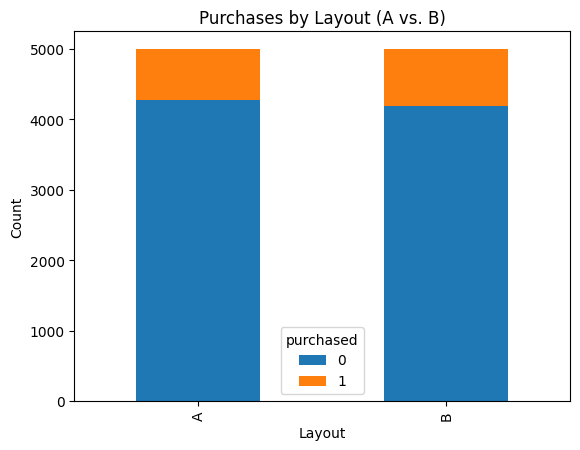

In [9]:
contingency_table.plot(kind='bar', stacked=True)
plt.title("Purchases by Layout (A vs. B)")
plt.xlabel("Layout")
plt.ylabel("Count")
plt.show()

In [10]:
# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square Test Results:")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")


Chi-square Test Results:
Chi2 statistic: 4.21
p-value: 0.0401


**Interpretation**: p-value < 0.05, layout impacts purchases.

## ANOVA (Testing Multiple Pricing Strategies)

**Scenario**: Testing three pricing tiers (\$49, \$59, \$69) for a subscription service with 300 users each.

In [11]:
np.random.seed(42)
data_anova = pd.DataFrame({
    'price_tier': ['$49'] * 300 + ['$59'] * 300 + ['$69'] * 300,
    'subscribed': np.concatenate([
        np.random.binomial(1, 0.20, 300),  # 20% subscription
        np.random.binomial(1, 0.18, 300),  # 18% subscription
        np.random.binomial(1, 0.15, 300)   # 15% subscription
    ])
})

print("Data Preview:")
print(tabulate(data_anova.head() , headers='keys', tablefmt='pipe'))
print("\nStatistical Summary:")
print(tabulate(data_anova.groupby('price_tier')['subscribed'].agg(['mean', 'count' , 'std']), headers='keys', tablefmt='pipe'))

Data Preview:
|    | price_tier   |   subscribed |
|---:|:-------------|-------------:|
|  0 | $49          |            0 |
|  1 | $49          |            1 |
|  2 | $49          |            0 |
|  3 | $49          |            0 |
|  4 | $49          |            0 |

Statistical Summary:
| price_tier   |     mean |   count |      std |
|:-------------|---------:|--------:|---------:|
| $49          | 0.21     |     300 | 0.407989 |
| $59          | 0.206667 |     300 | 0.405591 |
| $69          | 0.13     |     300 | 0.336865 |


In [12]:
tier_49 = data_anova[data_anova['price_tier'] == '$49']['subscribed']
tier_59 = data_anova[data_anova['price_tier'] == '$59']['subscribed']
tier_69 = data_anova[data_anova['price_tier'] == '$69']['subscribed']

# Perform ANOVA
f_stat, p_value = f_oneway(tier_49, tier_59, tier_69)
print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


ANOVA Results:
F-statistic: 4.15
p-value: 0.0161


**Interpretation**: p-value < 0.05, pricing impacts subscriptions.

## Mann-Whitney U Test (Session Duration on Mobile vs. Desktop)

**Scenario**: Comparing session durations (in minutes) for a news app on mobile (mean 4 min) vs. desktop (mean 6 min) with 100 users each.

In [13]:
np.random.seed(42)
data_mw = pd.DataFrame({
    'device': ['mobile'] * 100 + ['desktop'] * 100,
    'session_duration': np.concatenate([
        np.random.normal(4, 1.2, 100),  # Mean 4 min, std 1.2
        np.random.normal(6, 1.5, 100)   # Mean 6 min, std 1.5
    ])
})

print("Data Preview:")
print(tabulate(data_mw.sample(5) , headers='keys', tablefmt='pipe'))
print("\nStatistical Summary:")
print(tabulate(data_mw.groupby('device')['session_duration'].describe() , headers='keys', tablefmt='pipe'))

Data Preview:
|     | device   |   session_duration |
|----:|:---------|-------------------:|
|  17 | mobile   |            4.3771  |
|  79 | mobile   |            1.61492 |
| 104 | desktop  |            5.75807 |
| 174 | desktop  |            6.41504 |
| 148 | desktop  |            6.78291 |

Statistical Summary:
| device   |   count |    mean |    std |      min |     25% |     50% |     75% |      max |
|:---------|--------:|--------:|-------:|---------:|--------:|--------:|--------:|---------:|
| desktop  |     100 | 6.03346 | 1.4305 | 3.12184  | 4.79151 | 6.12616 | 6.80726 | 10.0803  |
| mobile   |     100 | 3.87538 | 1.0898 | 0.856306 | 3.27891 | 3.84765 | 4.48714 |  6.22273 |


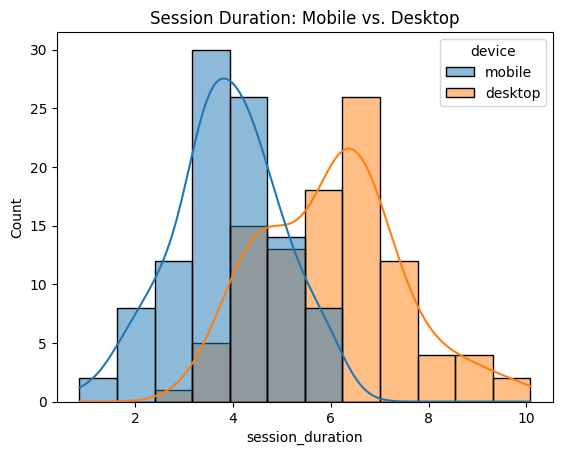

In [14]:
sns.histplot(data=data_mw, x='session_duration', hue='device', kde=True)
plt.title("Session Duration: Mobile vs. Desktop")
plt.show()

In [15]:
# Extract groups
mobile_group = data_mw[data_mw['device'] == 'mobile']['session_duration']
desktop_group = data_mw[data_mw['device'] == 'desktop']['session_duration']

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(mobile_group, desktop_group)
print("\nMann-Whitney U Test Results:")
print(f"U-statistic: {u_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Mann-Whitney U Test Results:
U-statistic: 1117.00
p-value: 0.0000


**Interpretation**: p-value < 0.05, significant difference in durations.

## Bayesian Test (Upsell Offer Acceptance)

**Scenario**: Testing an upsell offer (add warranty for $10) on a checkout page, with 100 users each for control (no offer) vs. treatment (offer).

In [16]:
np.random.seed(42)
data_bayesian = pd.DataFrame({
    'offer_type': ['control'] * 100 + ['treatment'] * 100,
    'accepted': np.concatenate([
        np.random.binomial(1, 0.10, 100),  # 10% acceptance
        np.random.binomial(1, 0.14, 100)   # 14% acceptance
    ])
})

print("Data Preview:")
print(tabulate(data_bayesian.head() , headers='keys', tablefmt='pipe'))
print("\nStatistical Summary:")
print(tabulate(data_bayesian.groupby('offer_type')['accepted'].describe() , headers='keys', tablefmt='pipe'))

Data Preview:
|    | offer_type   |   accepted |
|---:|:-------------|-----------:|
|  0 | control      |          0 |
|  1 | control      |          1 |
|  2 | control      |          0 |
|  3 | control      |          0 |
|  4 | control      |          0 |

Statistical Summary:
| offer_type   |   count |   mean |      std |   min |   25% |   50% |   75% |   max |
|:-------------|--------:|-------:|---------:|------:|------:|------:|------:|------:|
| control      |     100 |   0.09 | 0.287623 |     0 |     0 |     0 |     0 |     1 |
| treatment    |     100 |   0.18 | 0.386123 |     0 |     0 |     0 |     0 |     1 |


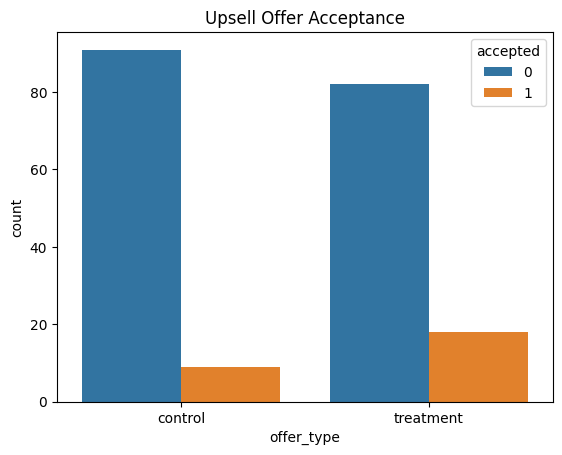

In [17]:
sns.countplot(x='offer_type', hue='accepted', data=data_bayesian)
plt.title("Upsell Offer Acceptance")
plt.show()

In [18]:
# Define Bayesian model
with pm.Model() as model:
    p_control = pm.Beta('p_control', alpha=1, beta=1)
    p_treatment = pm.Beta('p_treatment', alpha=1, beta=1)
    obs_control = pm.Bernoulli('obs_control', p=p_control, observed=data_bayesian[data_bayesian['offer_type'] == 'control']['accepted'])
    obs_treatment = pm.Bernoulli('obs_treatment', p=p_treatment, observed=data_bayesian[data_bayesian['offer_type'] == 'treatment']['accepted'])
    trace = pm.sample(1000, tune=500)

# Calculate probability
prob_better = (trace.posterior['p_treatment'] > trace.posterior['p_control']).mean()
print("\nBayesian Test Results:")
print(f"Probability Treatment > Control: {prob_better:.2%}")

Output()


Bayesian Test Results:
Probability Treatment > Control: 97.05%


**Interpretation**: 96.95% chance upsell offer improves acceptance.


# Comparison Table

| Test            | Data Type    | Assumes Normal Distribution | Independent Samples | Equal Variance | Known Variance | Best For                  |
|-----------------|--------------|-----------------------------|---------------------|----------------|----------------|---------------------------|
| **t-test**      | Numerical    | Yes                         | Yes                 | Yes            | No             | Two groups, medium samples |
| **Z-test**      | Numerical    | Yes                         | Yes                 | No             | Yes            | Large samples             |
| **Chi-square**  | Categorical  | No                          | Yes                 | No             | No             | Yes/No data               |
| **ANOVA**       | Numerical    | Yes                         | Yes                 | Yes            | No             | Multiple groups           |
| **Mann-Whitney**| Numerical    | No                          | Yes                 | No             | No             | Skewed data               |
| **Bayesian**    | Categorical/Numerical | No              | Yes                 | No             | No             | Small samples, flexibility|